In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
rawData = pd.read_csv('credit2.csv')

## Jack  the feature names are not correct in your project. Please address this before trying again to create your script and report" Also, regresssion ML with limit balance as the dependant is ONLY the first requirement. You should also attempt classification ML with limit balance as the dependant AND classification ML with Default as the dependant. 

## Your report itself is devoid of project summary and goals. Namely these(from C2/T1 project email): Over the past year or so Credit One has seen an increase in the number of customers who have defaulted on loans they have secured from various partners, and Credit One, as their credit scoring service, could risk losing business if the problem is not solved right away. The bottom line is they need a much better way to understand how much credit to allow someone to use or, at the very least, if someone should be approved or not. 


In [6]:
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2.0,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3.0,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4.0,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5.0,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

In [8]:
X = rawData.iloc[:, 5:15]

In [9]:
y = rawData.iloc[:,1]

In [10]:
model = LinearRegression(n_jobs=10)

In [11]:
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
print(cross_val_score(model, X, y, cv=3))

[0.25364461 0.27165371 0.26841778]


In [14]:
algosClass = []

algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

algosClass.append(('Linear Regression',LinearRegression()))

algosClass.append(('Support Vector Regression',SVR()))

In [15]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [16]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.3772286410450873
Linear Regression 0.26457203420147407
Support Vector Regression -0.05089900127122745


In [17]:
algo = LinearRegression()

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
model = algo.fit(X_train,y_train)

In [21]:
model

LinearRegression()

In [22]:
predictions = model.predict(X_test)
predictions

array([115554.13841632, 202761.42885141, 169382.52008667, ...,
        76469.38549889, 205253.92663572, 197364.24512059])

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [24]:
from math import sqrt

In [25]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [26]:
rmse

110971.99637303999

In [27]:
predRsquared = r2_score(y_test,predictions)

In [28]:
predRsquared

0.2756154732044883

In [29]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.276
RMSE: 110971.996


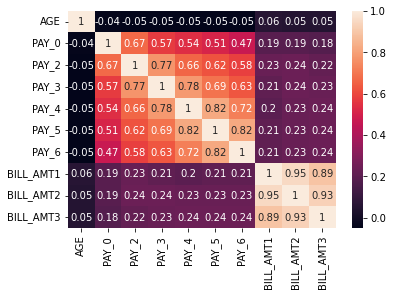

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = rawData.iloc[:, 5:15]
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [31]:
rawData["LIMIT_BAL"]

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64

In [32]:
min(rawData["LIMIT_BAL"])

10000

In [33]:
import pandas as pd

# Load data into a Pandas dataframe
##here
#min_val = rawData["LIMIT_BAL"].min()
#max_val = rawData["LIMIT_BAL"].max()

#bins=[5]

##50000 is cutoff, <50000 is label 1, >50000 is label 2
x = 80000
y = 80000

rawData['LIMIT_BAL_Labelnew'] =rawData['LIMIT_BAL'].where(rawData['LIMIT_BAL'] <= x, 1).where(rawData['LIMIT_BAL'] > x, 2).fillna(0)

#df['discrete_col'] = df['col'].where(df['col'] < x, 1).fillna(0)


# create a new column with three bins
#rawData['LIMIT_BAL_Labelnew'] = rawData['LIMIT_BAL'].where(rawData['LIMIT_BAL'] <= x, 'low')
#rawData['LIMIT_BAL_Labelnew'] = rawData['LIMIT_BAL_Labelnew'].where((rawData['LIMIT_BAL'] > x) & (rawData['LIMIT_BAL'] <= y), 'medium')
#rawData['LIMIT_BAL_Labelnew'] = rawData['LIMIT_BAL_Labelnew'].where(rawData['LIMIT_BAL'] > y, 'high')

# print the dataframe
print(rawData)


            ID  LIMIT_BAL     SEX    EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
0          1.0      20000  female   university         1   24      2      2   
1          2.0     120000  female   university         2   26     -1      2   
2          3.0      90000  female   university         2   34      0      0   
3          4.0      50000  female   university         1   37      0      0   
4          5.0      50000    male   university         1   57     -1      0   
...        ...        ...     ...          ...       ...  ...    ...    ...   
29995  29996.0     220000    male  high school         1   39      0      0   
29996  29997.0     150000    male  high school         2   43     -1     -1   
29997  29998.0      30000    male   university         2   37      4      3   
29998  29999.0      80000    male  high school         1   41      1     -1   
29999  30000.0      50000    male   university         1   46      0      0   

       PAY_3  PAY_4  ...  BILL_AMT5  BILL_AMT6  PAY

In [34]:
rawData['LIMIT_BAL']

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64

In [35]:
rawData['LIMIT_BAL_Labelnew'].unique()

array([2, 1])

In [36]:
X = rawData.iloc[:, 5:20]
y=rawData.iloc[:,25]


In [37]:
rawData.columns.get_loc("LIMIT_BAL_Labelnew")

25

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Train the classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Test the classifier
y_predn = clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy_Lim_Bal1 = accuracy_score(y_test, y_predn)

print("Accuracy: {:.2f}".format(accuracy_Lim_Bal1))

Accuracy: 0.76


In [43]:
from sklearn.svm import SVC


# Train the classifier
clf1 = SVC()
clf1.fit(X_train, y_train)

# Test the classifier
y_pred1 = clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy_Lim_Bal2 = accuracy_score(y_test, y_pred1)

print("Accuracy: {:.2f}".format(accuracy_Lim_Bal2))

Accuracy: 0.76


In [ ]:
y_pred1[154]

In [ ]:
np.where(y_pred1==1)

In [45]:
X1 = rawData.iloc[:, 5:20]
y1=rawData.iloc[:,24]


In [46]:
rawData.columns.get_loc("default payment next month")

24

In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Train the classifier
clf = DecisionTreeClassifier()
clf.fit(X_train1, y_train1)

# Test the classifier
y_pred1 = clf.predict(X_test1)
y_test1


2308     not default
22404    not default
23397    not default
25058    not default
2664         default
            ...     
3211     not default
9355     not default
28201        default
19705        default
28313    not default
Name: default payment next month, Length: 7500, dtype: object

In [49]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy_Default1 = accuracy_score(y_test1, y_pred1)

print("Accuracy: {:.2f}".format(accuracy_Default1))

Accuracy: 0.72


In [50]:
from sklearn.svm import SVC


# Train the classifier
clf1 = SVC()
clf1.fit(X_train1, y_train1)

# Test the classifier
y_pred2 = clf.predict(X_test1)

In [51]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy_Default2 = accuracy_score(y_test1, y_pred2)

print("Accuracy: {:.2f}".format(accuracy_Default2))

Accuracy: 0.72


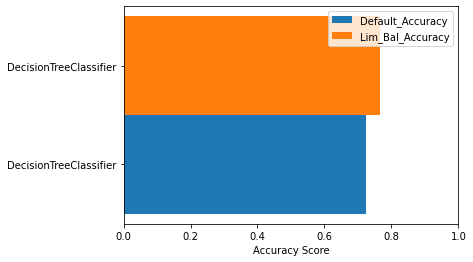

In [55]:
import matplotlib.pyplot as plt

# assume that the accuracy scores are stored in variables called 'accuracy_1' and 'accuracy_2'

# create a figure and axis
fig, ax = plt.subplots()

# plot the first accuracy score as a horizontal bar
ax.barh(y=0, width=accuracy_Default1, height=1, label='Default_Accuracy')

# plot the second accuracy score as a horizontal bar
ax.barh(y=1, width=accuracy_Lim_Bal1, height=1, label='Lim_Bal_Accuracy')

# set the x-axis limits
ax.set_xlim(0, 1)

# set the x-axis tick labels
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# set the y-axis tick labels
ax.set_yticks([0, 1])
ax.set_yticklabels(['DecisionTreeClassifier', 'DecisionTreeClassifier'])

# set the x-axis label
ax.set_xlabel('Accuracy Score')

# show the legend
ax.legend()

# show the plot
plt.show()

In [53]:
plt.show()

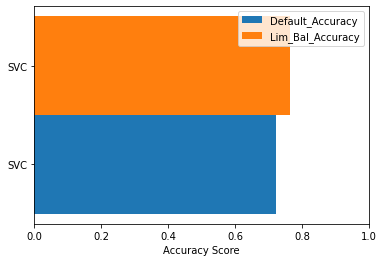

In [56]:
import matplotlib.pyplot as plt

# assume that the accuracy scores are stored in variables called 'accuracy_1' and 'accuracy_2'

# create a figure and axis
fig, ax = plt.subplots()

# plot the first accuracy score as a horizontal bar
ax.barh(y=0, width=accuracy_Default2, height=1, label='Default_Accuracy')

# plot the second accuracy score as a horizontal bar
ax.barh(y=1, width=accuracy_Lim_Bal2, height=1, label='Lim_Bal_Accuracy')

# set the x-axis limits
ax.set_xlim(0, 1)

# set the x-axis tick labels
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# set the y-axis tick labels
ax.set_yticks([0, 1])
ax.set_yticklabels(['SVC', 'SVC'])

# set the x-axis label
ax.set_xlabel('Accuracy Score')

# show the legend
ax.legend()

# show the plot
plt.show()